<a href="https://colab.research.google.com/github/slwilliams055/EDA/blob/main/HW3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/slwilliams055/EDA.git
import pandas as pd
import numpy as np

Cloning into 'EDA'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 37 (delta 3), reused 2 (delta 2), pack-reused 31 (from 2)
Receiving objects: 100% (37/37), 4.93 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Q2

In [4]:
# 1) loading the data
ForeignGifts = pd.read_csv("EDA/assignment/data/ForeignGifts_edu.csv")
ForeignGifts.head()
#print(ForeignGifts.columns, '\n') # Column names

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [3]:
# 2) Creating histogram for foreign gift amount
import matplotlib.pyplot as plt
#print(ForeignGifts['Foreign Gift Amount'].describe())
#print(ForeignGifts['Foreign Gift Amount'].unique())
plt.hist(ForeignGifts['Foreign Gift Amount'].dropna(), bins=20)
plt.title("Histogram of Foreign Gift Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

NameError: name 'ForeignGifts' is not defined

This shows a distribution that is skewed far to the left at lower value amounts for Foreign gifts. It could be described as a long tail distribution with a steep head at lower, more common and accesible values, with a sharp decrease in frequency at higher dollar amounts.

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


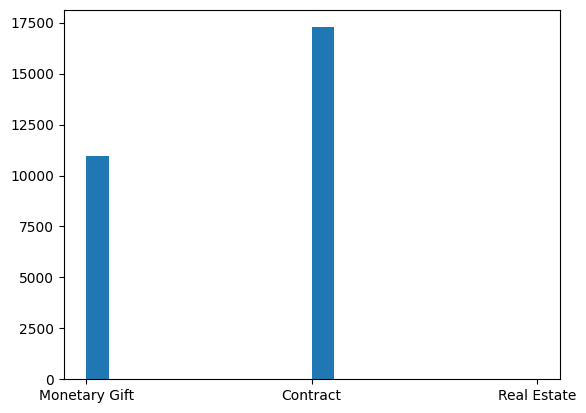

In [6]:
# 3) Finding value counts and histogram for Gift Type variable
plt.hist(ForeignGifts['Gift Type'].dropna(), bins=20)
ForeignGifts['Gift Type'].value_counts(normalize=True)

The proportion of gifts that are contract, monetary gift, or real estate are 61.2%, 38.75%, and ~0.05%, respectively.

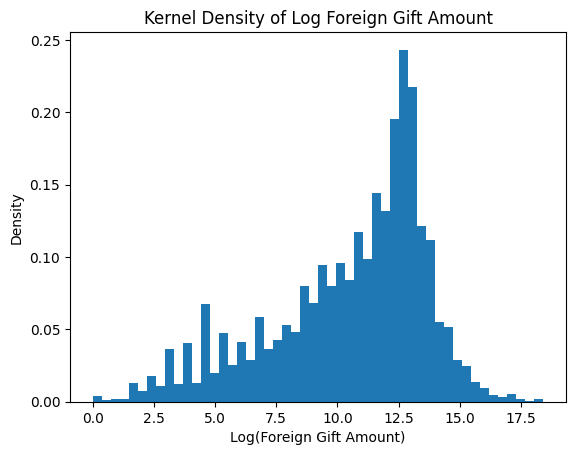

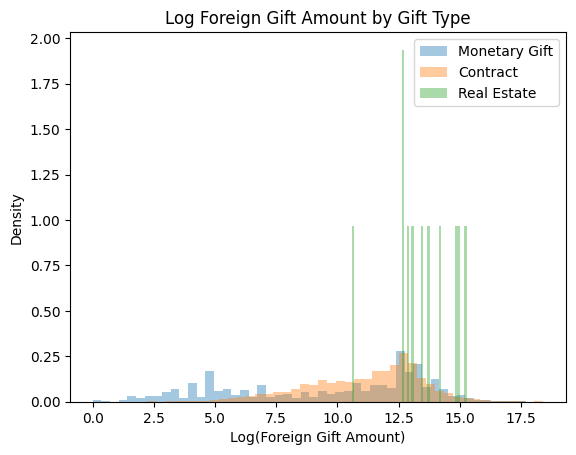

In [7]:
# 4) Kernel density plots
# Drop missing and non-positive values
log_amount = np.log(
    ForeignGifts['Foreign Gift Amount']
    .dropna()
    [ForeignGifts['Foreign Gift Amount'] > 0]
)

# Kernel density plot: Foreign Gift Amount
plt.figure()
plt.hist(log_amount, bins=50, density=True)
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Kernel Density of Log Foreign Gift Amount')
plt.show()

# Kernel density plot of Foreign Gift Amount by Gift type
plt.figure()
for gift_type in ForeignGifts['Gift Type'].dropna().unique():
    subset = ForeignGifts[
        (ForeignGifts['Gift Type'] == gift_type) &
        (ForeignGifts['Foreign Gift Amount'] > 0)
    ]
    plt.hist(
        np.log(subset['Foreign Gift Amount']),
        bins=50,
        density=True,
        alpha=0.4,
        label=gift_type
    )
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Log Foreign Gift Amount by Gift Type')
plt.legend()
plt.show()


This is an interesting comparison, especially with what we saw in the histograms above. In the kernel density plot of Foreign Gift Amount alone, it looks like there is a more symmetric distribution with a higher density of values in one spot. On first glance, this plot makes it seem like the data is distributed somewhat evenly, and it makes it look like it trends towards higher density at higher amoutns. However, when you then look at this same plot conditional on the gift type, it tells almost a completely different story. In this plot, there are many more patterns having to do with gift type. For one, you can now see that the data driving the higher density at ~log(12.5) is the real estate type, which is unexpected given how little proportion of the data is labeled by this type. You can notice that it has higher densities at higher foreign gift amounts, while the other two labels (contract and monetary gift) which are much more robust in the data set, are distributed more evenly across a wide range of the kernel density plot. There are fewer real estate observations, and they are concentrated at higher log values, whereas contracts and monetary gifts are much more spread out.

In [14]:
# 5) What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
top15_numberofgifts = (
    ForeignGifts['Country of Giftor']
    .value_counts()
    .head(15)
    .reset_index()
)

top15_numberofgifts.columns = ['Country of Giftor', 'Number of Gifts']
# this just plots based on the intrinsic ability of head to sort by ascending.

top15_amount = (
    ForeignGifts
    .groupby('Country of Giftor')['Foreign Gift Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
display(top15_numberofgifts)
display(top15_amount)

# This shows the top 15 coutnries in terms of number of gifts, and then the top 15 in terms of the amount gifted.

,Country of Giftor,Number of Gifts
0,ENGLAND,3655
1,CHINA,2461
2,CANADA,2344
3,JAPAN,1896
4,SWITZERLAND,1676
5,SAUDI ARABIA,1610
6,FRANCE,1437
7,GERMANY,1394
8,HONG KONG,1080
9,SOUTH KOREA,811


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


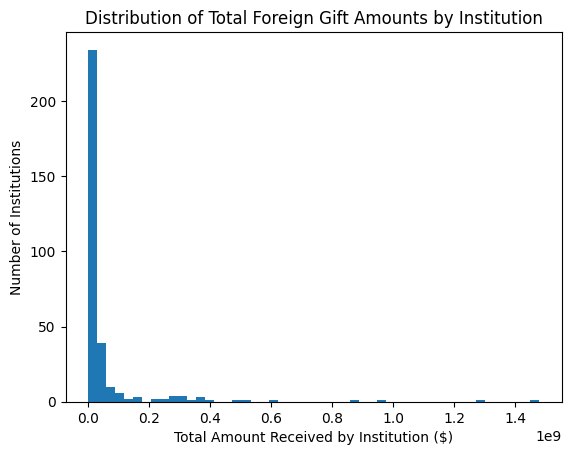

In [19]:
# 6) What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
top15_institutions_amount = (
    ForeignGifts
    .groupby('Institution Name')['Foreign Gift Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
display(top15_institutions_amount)

# histogram
institution_totals = (
    ForeignGifts
    .groupby('Institution Name')['Foreign Gift Amount']
    .sum()
)
plt.figure()
plt.hist(institution_totals, bins=50)
plt.xlabel('Total Amount Received by Institution ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Foreign Gift Amounts by Institution')
plt.show()


In [24]:
# 7) Which giftors provide the most money, in total?
top_giftors = (
    ForeignGifts
    .groupby('Country of Giftor')['Foreign Gift Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)
display(top_giftors)
giftor_totals = (
    ForeignGifts
    .groupby('Country of Giftor')['Foreign Gift Amount']
    .sum()
)
giftor_totals.sort_values(ascending=False).head()
display(giftor_totals.idxmax(), giftor_totals.max())
# I think this is asking something very similar to the earlier question 5. Here I instead showed the single country that gave the most amount, but you could have also seen this by the table.
# If the question was asking which countries gifted the highest amount in one gift then you could look at this to show the single most expensive gift and who gifted it.
ForeignGifts.loc[
    ForeignGifts['Foreign Gift Amount'].idxmax()
]


,Country of Giftor,Foreign Gift Amount
0,QATAR,2706240869
1,ENGLAND,1464906771
2,CHINA,1237952112
3,SAUDI ARABIA,1065205930
4,BERMUDA,899593972
5,CANADA,898160656
6,HONG KONG,887402529
7,JAPAN,655954776
8,SWITZERLAND,619899445
9,INDIA,539556490


'QATAR'

2706240869

,16648
ID,16649
OPEID,219900
Institution Name,Northeastern University
City,Boston
State,MA
Foreign Gift Received Date,43811
Foreign Gift Amount,99999999
Gift Type,Contract
Country of Giftor,AUSTRALIA
Giftor Name,QIC


# Q3

In [4]:
# 1) load the data
airbnb = pd.read_csv("EDA/assignment/data/airbnb_hw.csv")

# 2) What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
airbnb.shape # 30478,13
len(airbnb)
airbnb.columns
airbnb.head()

# There are 30468 observations and 14 columns/variables (including the index).
# The columns are: 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type','Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds','Number of Records',
# 'Number Of Reviews', 'Price','Review Scores Rating'.

# 3) Cross tabulate Room Type and Property Type.
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
pd.crosstab(
    airbnb['Room Type'],
    airbnb['Property Type'],
    normalize='columns'
)


Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,0.578149,0.072222,0.875,1.0,0.5,0.857143,0.0,0.0,0.765957,0.129032,0.359809,0.0,1.0,0.520584,0.297872,0.0,0.610294,0.00,0.5
Private room,0.396576,0.861111,0.125,0.0,0.5,0.142857,1.0,1.0,0.234043,0.516129,0.601914,1.0,0.0,0.414343,0.617021,1.0,0.382353,0.25,0.5
Shared room,0.025275,0.066667,0.000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.354839,0.038278,0.0,0.0,0.065073,0.085106,0.0,0.007353,0.75,0.0


For room types of entire homes/apartments, there is a majority proportion of apartments available (57% of all entire home rentals). However, 86% of private room rentals are available in a bed and breakfast. There is a fairly even proportion of apartments and townhomes providing private rooms (~40%). Interestingly, shared rooms are offered most in dorms. This suprised me honestly because I did not know a dorm could qualify as an airbnb listing.

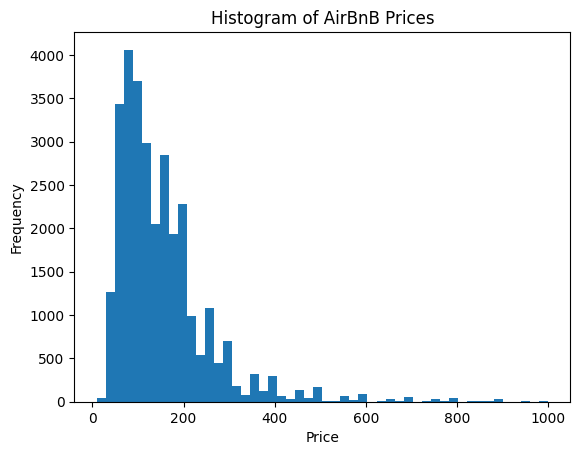

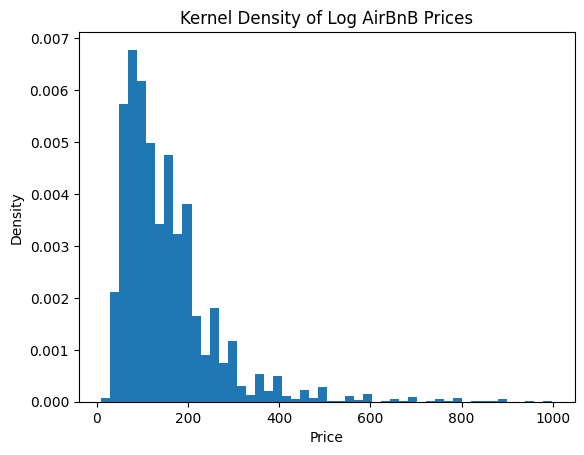

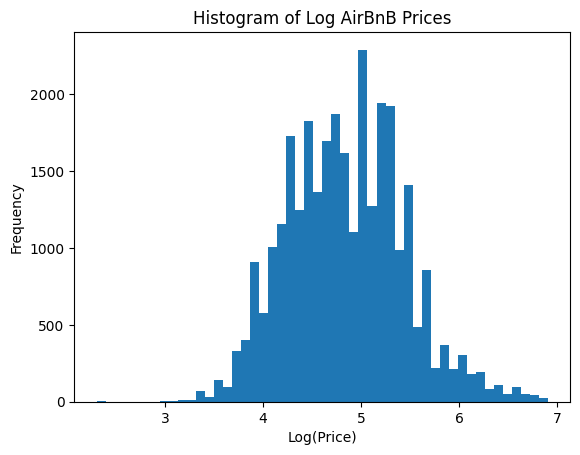

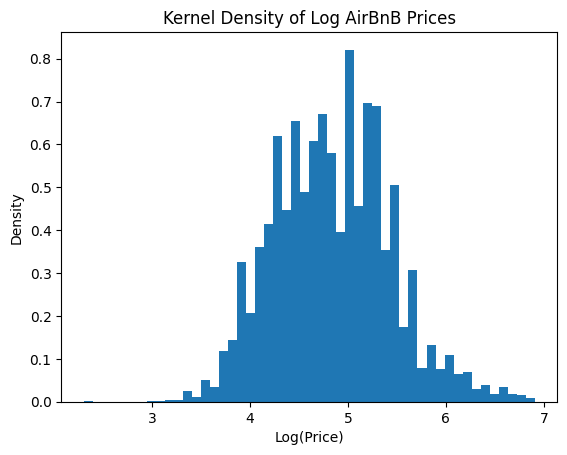

In [5]:
# For Price, make a histogram, kernel density, box plot, and a statistical description of the variable.
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# histogram
plt.hist(airbnb['Price'].dropna(), bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of AirBnB Prices')
plt.show()
airbnb['Price'].value_counts()

# kernel density

plt.figure()
plt.hist(airbnb['Price'], bins=50, density=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density of Log AirBnB Prices')
plt.show()

# Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.
# The data was fairly skewed to the left, meaning it was skewed toward lower price values.

price_log = np.log(
    airbnb['Price']
    .dropna()
    [airbnb['Price'] > 0]
)

plt.hist(price_log, bins=50)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log AirBnB Prices')
plt.show()
airbnb['Price'].value_counts()

plt.figure()
plt.hist(price_log, bins=50, density=True)
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.title('Kernel Density of Log AirBnB Prices')
plt.show()

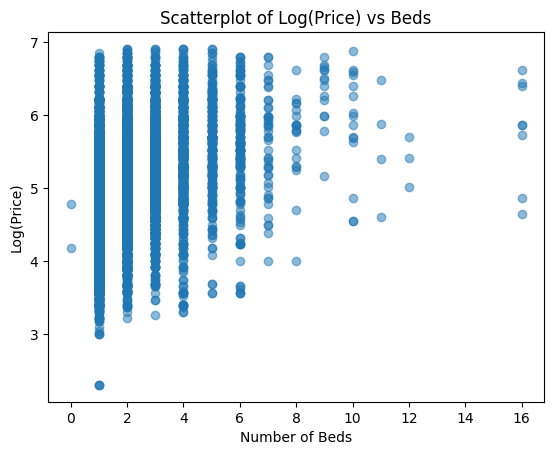

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [6]:
# 5) Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped
#by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

# need beds to be the same size i.e. only positive values
airbnb_clean = airbnb[airbnb['Price'] > 0].copy()
price_log = np.log(
    airbnb['Price']
    .dropna()
    [airbnb['Price'] > 0]
)
plt.scatter(airbnb_clean['Beds'], price_log, alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot of Log(Price) vs Beds')
plt.show()

price_by_beds = airbnb_clean.groupby('Beds')['Price'].describe()
price_by_beds

The scatterplot shows that for one, the number of listings decreases as the number of beds increases. This shows that there are a greater number of listings for a lower number of beds, and a greater price range at those bed numbers. This range probably arises from a shear increase in data, but it is also interesting to see that among listings with the exact same amount of beds, the price could be within a huge range. For the price by beds data, the mean for lower # of beds is much lower (likely because of a wide spread of data), whereas the mean for bed #s 9 and 10 are much higher than the rest.

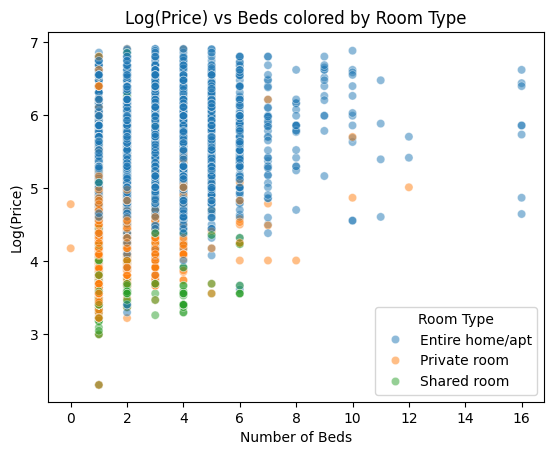

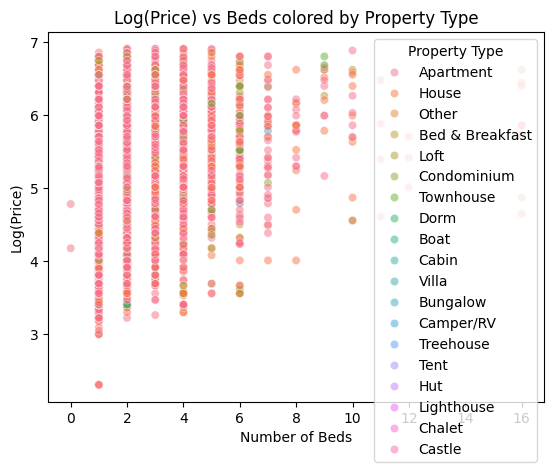

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,16855.0,204.061525,116.531136,10.0,135.0,175.0,239.0,999.0
Private room,12599.0,90.663227,47.914195,10.0,65.0,80.0,100.0,999.0
Shared room,843.0,76.553974,65.756210,10.0,45.0,60.0,85.0,950.0


,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,26975.0,153.863170,104.112805,10.0,85.00,129.0,195.00,999.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,93.0,237.946237,172.754121,46.0,130.00,175.0,295.00,850.0


In [8]:
# 6) Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see?
import matplotlib.pyplot as plt

airbnb_clean = airbnb[airbnb['Price'] > 0].copy()
airbnb_clean['Price_log'] = np.log(airbnb_clean['Price'])

import seaborn as sns

sns.scatterplot(data=airbnb_clean, x='Beds', y='Price_log', hue='Room Type', alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds colored by Room Type')
plt.show()

sns.scatterplot(data=airbnb_clean, x='Beds', y='Price_log', hue='Property Type', alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds colored by Property Type')
plt.show()

# Compute a description of Price conditional on Room Type and Property Type.
airbnb_clean['Price'] = pd.to_numeric(airbnb_clean['Price'], errors='coerce')

price_summary_byRoom = airbnb_clean.groupby(['Room Type'])['Price'].describe()
display(price_summary_byRoom)

price_summary_byProperty = airbnb_clean.groupby(['Property Type'])['Price'].describe()
display(price_summary_byProperty)


6) There are several patterns to the scatter plots in both the room type and property type comparisons. For the room type grouping, entire homes/apartments trend toward higher pricing, whereas shared rooms in general trend lower than both the other categories. Similarly, there is a wide spread of prices with more data spread across the range of bed numbers from 1 to 6-8. This is true of the property type grouping, likely due to the demand for airbnb's with a more practical 2-4 number of beds. The property type grouping looks to just be a big blob. It is hard to gather information from this plot, and my guess is it is because different properties can have varying sizes across the board (for example an apartment could have 1 or 0 bedrooms, and then a huge penthouse suite could have 6).
The room type that has the highest price on average looks to be entire houses/apartments across # of bed values. The property type with the highest prices on average are harder to tell by the scatter plot because of the overwhelming amount of data with type apartment, house, other. In general, the property type scatter plot is hard to gather trends from, but it looks like there is a wide range of prices across property types, likely due to differences in bed numbers and room types within. The room type with the highest standard deviation is entire homes/apartment, again likely because of the shear amount of data. The property type with the highest standard deviation is "Other" closely followed by Condominium. My guess is that this is due to the shear amount of data again, especially because properties titled "other" may vary in several characteristics which would ultimately affect price. The mean in both cases will likely be a better measure of central tendency because although it is not dramatic, the data is still slightly skewed to the left. By using the mean, you can get the true central tendency of the data itself, which may not actually fall in the middle but describe better how the data trends, as opposed to the median which may pick a value too far to the right.


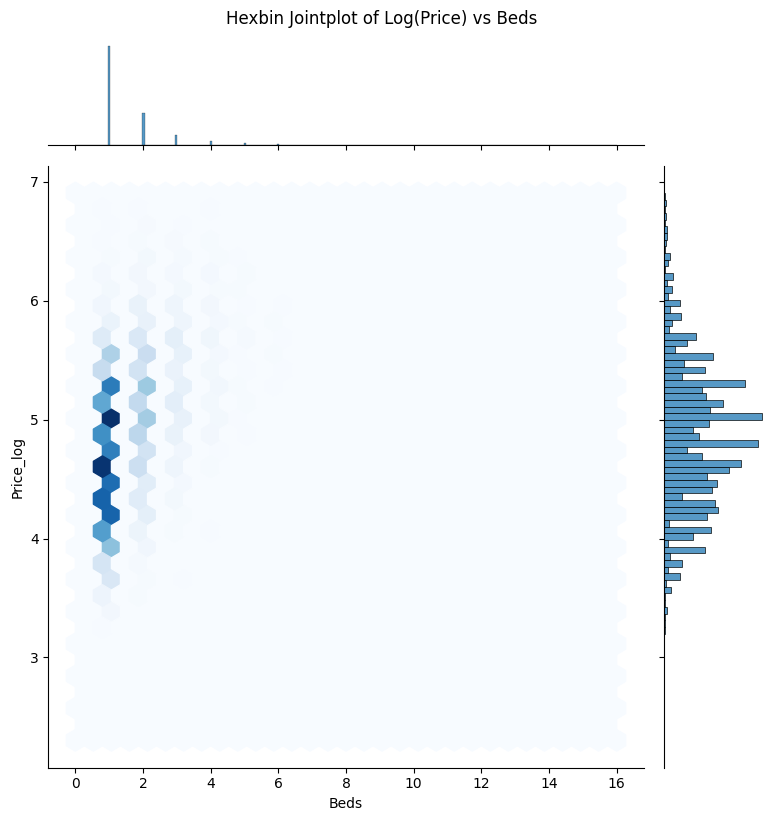

In [61]:
# 7) We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex.
sns.jointplot(
    data=airbnb_clean,
    x='Beds',
    y='Price_log',
    kind='hex',
    height=8,
    gridsize=30,
    cmap='Blues'
)
plt.suptitle('Hexbin Jointplot of Log(Price) vs Beds', y=1.02)
plt.show()

The data are heavily concentrated in a very small region of the plot where there are mostly 1-3 beds. This region contains the vast majority of listings but outside of that, listing with 5+ beds or extremely high prices are very rare although they sort of dominated the scatterplots. In plots 5 and 6, the true density of the data may have been hidden by overplotting where a small number of extreme listings stretched the axes. This made it look like price increases smoothly across all bed counts, when in reality most listings were tightly clustered at low bed counts and moderate prices. The hexbin plot reveals that the apparent trends in the scatterplots are driven by a small number of outliers instead of a large chunk of data.

# Q4


In [3]:
# 1) Load the data
rigs = pd.read_csv("EDA/assignment/data/drilling_rigs.csv")

rigs.head()
rigs.shape # 623,10
display(rigs.columns)
rigs.head()
# There are 623 observations, 9 variables. Numeric variables
rigs.dtypes


Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


The dataset contains 623 observations and 9 variables. While several variables represent numeric quantities, some are read in as object types due to non-numeric characters and missing value encodings. These variables must be coerced into numeric form using pd.to_numeric, with invalid entries converted to missing values. After type coercion, rows with missing values in key numeric variables should be handled appropriately. This cleaning ensures that numeric analyses and visualizations are valid.

In [4]:
# 2) convert month to an ordered datetime variable
rigs['time'] = pd.to_datetime(rigs['Month'], format='mixed')

rigs.head()


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549,1973-01-01
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677,1973-02-01
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805,1973-03-01
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898,1973-04-01
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991,1973-05-01


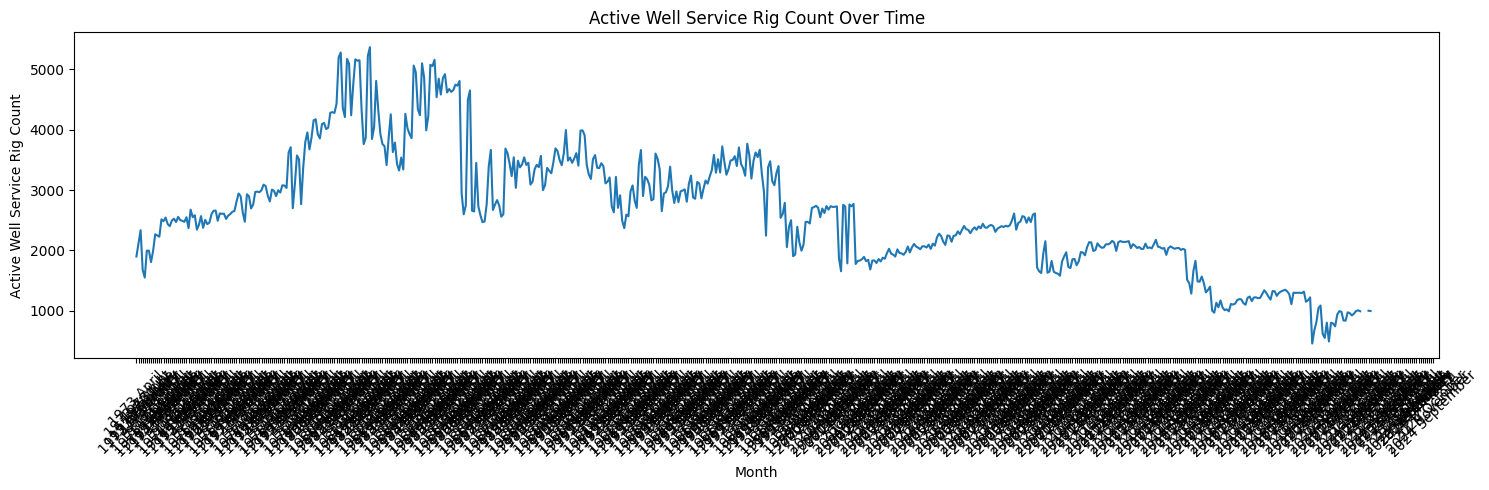

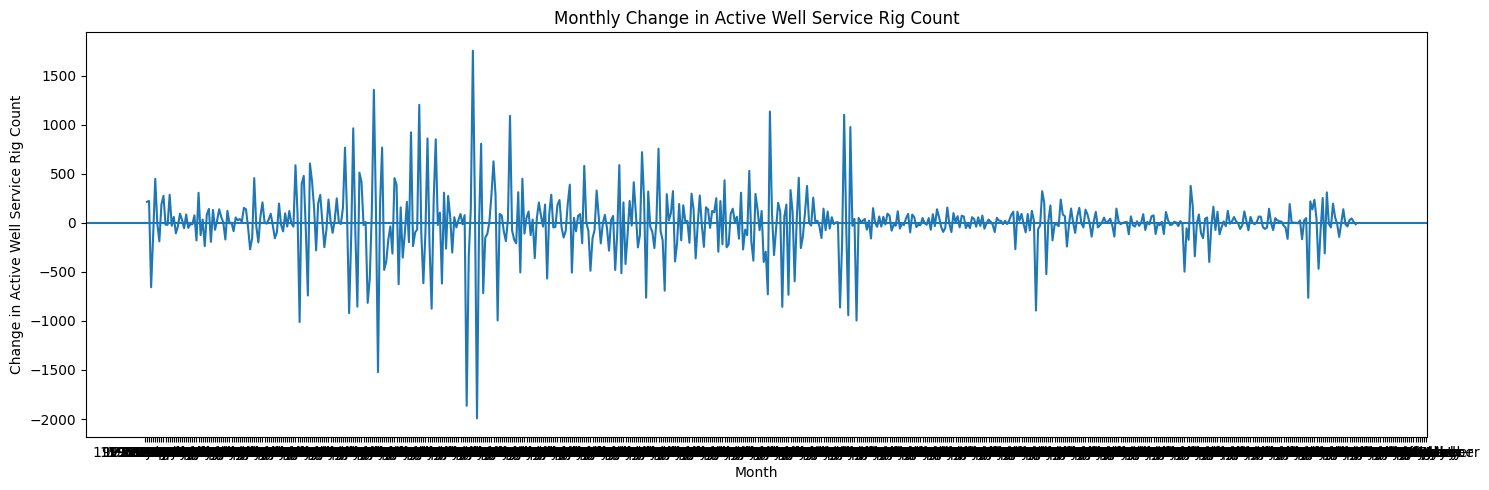

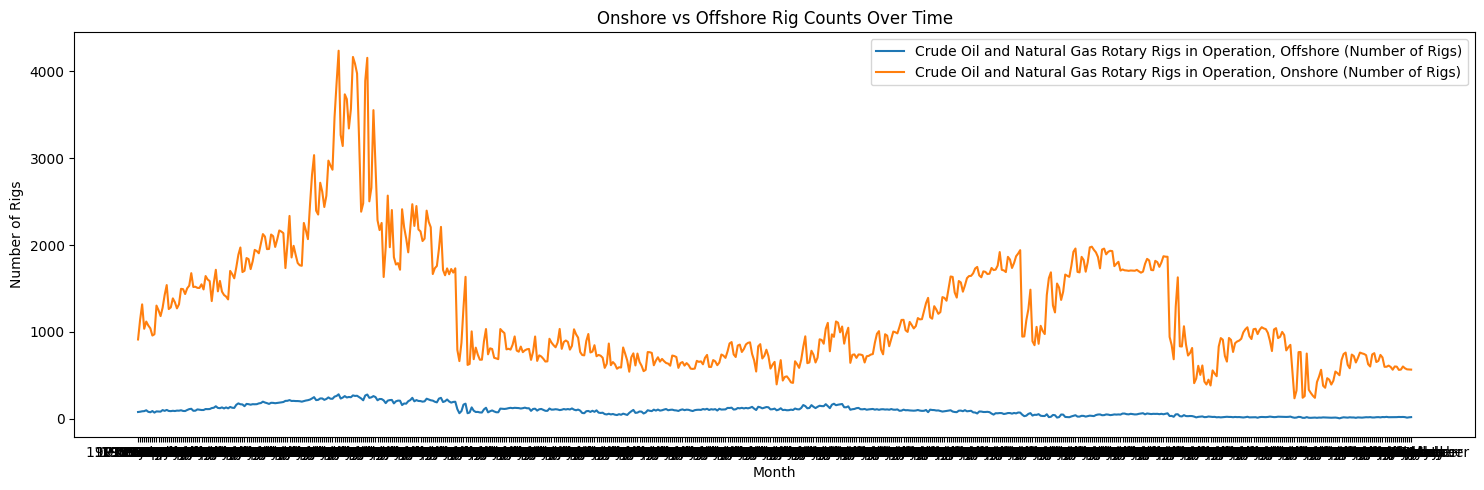

In [6]:
# 3) plot Active Well Service Rig Count (Number of Rigs) over time
import matplotlib.pyplot as plt
import pandas as pd
# Make sure Month is datetime and sorted
rigs['Active Well Service Rig Count (Number of Rigs)'] = (
    pd.to_numeric(
        rigs['Active Well Service Rig Count (Number of Rigs)'],
        errors='coerce'
    )
)
rigs = rigs.sort_values('Month')

plt.figure(figsize=(15, 5))
plt.plot(
    rigs['Month'],
    rigs['Active Well Service Rig Count (Number of Rigs)']
)
plt.xlabel('Month')
plt.ylabel('Active Well Service Rig Count')
plt.title('Active Well Service Rig Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#######################################################################################

# 4) Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot over time
# Make sure the variable is numeric
rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    rigs['Active Well Service Rig Count (Number of Rigs)'],
    errors='coerce'
)
# Sort by time
rigs = rigs.sort_values('Month')
# First difference
rigs['rig_count_diff'] = rigs['Active Well Service Rig Count (Number of Rigs)'].diff()
# Plot
plt.figure(figsize=(15,5))
plt.plot(rigs['Month'], rigs['rig_count_diff'])
plt.axhline(0)
plt.xlabel('Month')
plt.ylabel('Change in Active Well Service Rig Count')
plt.title('Monthly Change in Active Well Service Rig Count')
plt.tight_layout()
plt.show()

######################################################################################

# 5)
onshore_col = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
offshore_col = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
rigs_long = rigs.melt(
    id_vars='Month',
    value_vars=[onshore_col, offshore_col],
    var_name='Rig Type',
    value_name='Rig Count'
)
rigs_long['Rig Count'] = pd.to_numeric(rigs_long['Rig Count'], errors='coerce') # Ensure numeric
# Sort by time
rigs_long = rigs_long.sort_values('Month')
plt.figure(figsize=(15,5))
for rig_type, df_sub in rigs_long.groupby('Rig Type'):
    plt.plot(df_sub['Month'], df_sub['Rig Count'], label=rig_type)
plt.xlabel('Month')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.legend()
plt.tight_layout()
plt.show()


For the plot of active well service rig counts over time, you can see a general trend down of Active well service rig counts. It is very noise, in the sense that there are lots of spikes and fluctuations. It shows that there are more, drastic changes during certain months, whereas other time periods fluctuate much less. Overall the number of rigs decreases over time. It also looks like there is a certain group of months where it dips rapidly and then increases a bit, which likely represents seasonal trends affecting the service rig counts, and then other months may not necessitate as much change.

When plotting the first difference of active well service rigs over time, it also shows a general trend down as time goes on. Graphing the change between consecutive time periods shows the drastic shifts over time a little bit better. You can see the individual fluctuations from one timepoint to another, which may indicate that certain seasonal/time changes occur due to the nature of the data. You can see during what time periods does the data drastically fluctuates, whereas as the data trends down, it fluctuates much less.

When I melted the onshore and offshore columns to plot the series over time,variables behave. You can see that the # of offshore rigs does not fluctuate nearly as much as the # of onshore rigs, across the data.